In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
data = pd.read_csv('social_data_2.csv')

In [29]:
data.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,Game 3,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,Game 3,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,Game 3,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,Game 3,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,Game 3,TWITTER,Community Engagement,9517,1215,Video


In [30]:
data.describe(include='all')

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
count,3479,3479,3479,3479,3479.000000,3479.000000,3479
unique,2411,6,6,4,NaN,NaN,7
top,03-29-2023 13:00,General,TWITTER,N/A,NaN,NaN,Photo
freq,12,2271,1951,1485,NaN,NaN,1490
mean,NaN,NaN,NaN,NaN,10972.453579,947.390629,NaN
std,NaN,NaN,NaN,NaN,29577.108063,3468.628038,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,167.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,1884.000000,39.000000,NaN
75%,NaN,NaN,NaN,NaN,12467.000000,276.500000,NaN


In [31]:
data = data.drop(data[data['Published Date'] == ''].index, axis=1)

In [32]:
# Discarded entries with zero 'Total Impressions' and 'Total Engagements’
data = data[(data['Total Impressions'] != 0) | (data['Total Engagements'] != 0)]

In [33]:
# there is only 4 record on media type = 'Album' but only 1 of those records has impressions and engagements  remove it since it may skewed fidings
data = data[data['Media Type'] != 'Album']

In [34]:
data['Account'] = data['Account'].replace({'General ': 'General'}, regex=True)  # Standardize variations

In [57]:
################################ ENGAGEMENT RATE  ########################

In [38]:
# Calculate the average engament rate across the whole dataset 
total_engagements = data['Total Engagements'].sum()
total_impressions = data['Total Impressions'].sum()

avg_engagement_rate = total_engagements / total_impressions

avg_engagement_rate*100

8.634247751023718

In [56]:
# Group data by account type and calculate average engagement rate per account type
engagement_by_account = (data.groupby('Account Type')['Total Engagements'].sum() /
                                  data.groupby('Account Type')['Total Impressions'].sum()) * 100


engagement_by_account.reset_index()

,Account Type,0
0,FBPAGE,17.807319
1,INSTAGRAM,2.352703
2,LINKEDIN_COMPANY,1.983599
3,TIKTOK_BUSINESS,5.481478
4,TWITTER,3.100208
5,YOUTUBE,4.332160


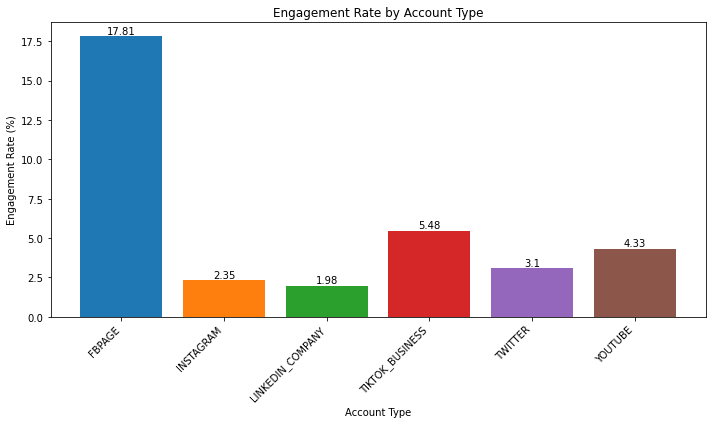

In [59]:
# Create a bar graph of the engagement rates by account type with value labels
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(engagement_by_account.index, engagement_by_account.values, color=colors)

plt.xlabel('Account Type')
plt.ylabel('Engagement Rate (%)')
plt.title('Engagement Rate by Account Type')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Adjust x-ticks to show account type names instead of numeric indexes
plt.xticks(range(len(engagement_by_account.index)), engagement_by_account.index)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [49]:
# Group data by media type and calculate average engagement rate per account type
engagement_by_media = (data.groupby('Media Type')['Total Engagements'].sum() /
                                  data.groupby('Media Type')['Total Impressions'].sum()) * 100


engagement_by_media.reset_index()

,Media Type,0
0,Carousel,4.070596
1,Link,0.970899
2,Mixed,7.386585
3,Photo,9.072318
4,Text,7.929681
5,Video,8.111998


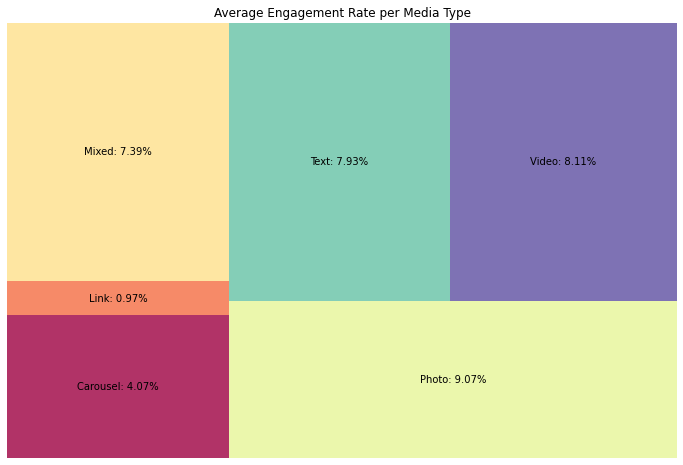

In [92]:
# Convert the Series to DataFrame for easier handling (if not already a DataFrame)
engagement_by_media_df = engagement_by_media.reset_index(name='Engagement Rate')

# Prepare labels that include the media type and the percentage of engagement rate
labels = [f'{row["Media Type"]}: {row["Engagement Rate"]:.2f}%' for index, row in engagement_by_media_df.iterrows()]

# Prepare sizes for the treemap
sizes = engagement_by_media_df['Engagement Rate'].values

# Choose a color map
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

# Additional plot adjustments
plt.title('Average Engagement Rate by Media Type')
plt.axis('off')  # Hide axes

plt.show()

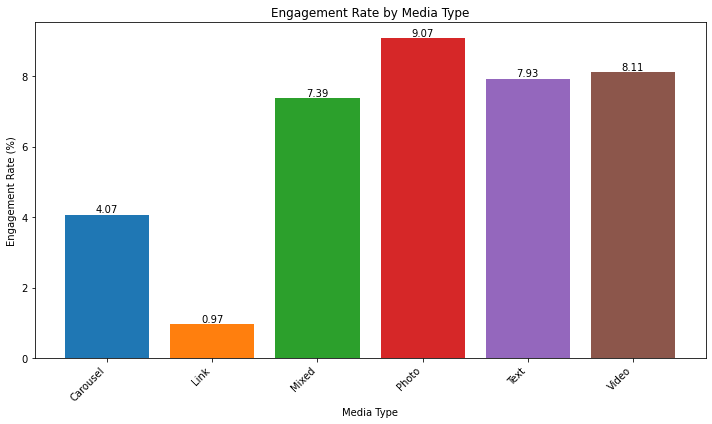

In [62]:
# Create a bar graph of the engagement rates by media type with value labels
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(engagement_by_media.index, engagement_by_media.values, color=colors)

plt.xlabel('Media Type')
plt.ylabel('Engagement Rate (%)')
plt.title('Engagement Rate by Media Type')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Adjust x-ticks to show media type names instead of numeric indexes
plt.xticks(range(len(engagement_by_media.index)), engagement_by_media.index)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [24]:
########################## IMPACT OF POSTING TIME  ###############

In [63]:
# Convert "Published Date" column to datetime format
data['Published Date'] = pd.to_datetime(data['Published Date'])

In [64]:
data.dtypes

Published Date       datetime64[ns]
Account                      object
Account Type                 object
Campaign Name                object
Total Impressions             int64
Total Engagements             int64
Media Type                   object
dtype: object

In [72]:
# Extract 'Day of Week' and 'Hour'
data['Day of Week'] = data['Published Date'].dt.day_name()
data['Hour'] = data['Published Date'].dt.hour

In [73]:
# Correct aggregation to calculate the engagement per impression ratio for each Day of Week and Hour
grouped_data_correct = data.groupby(['Day of Week', 'Hour']).apply(
    lambda x: (x['Total Engagements'].sum() / x['Total Impressions'].sum()) if x['Total Impressions'].sum() > 0 else 0
).reset_index(name='Engagement per Impression Ratio')


In [74]:
# Create a pivot table for the heatmap
pivot_data_correct = grouped_data_correct.pivot("Day of Week", "Hour", "Engagement per Impression Ratio")

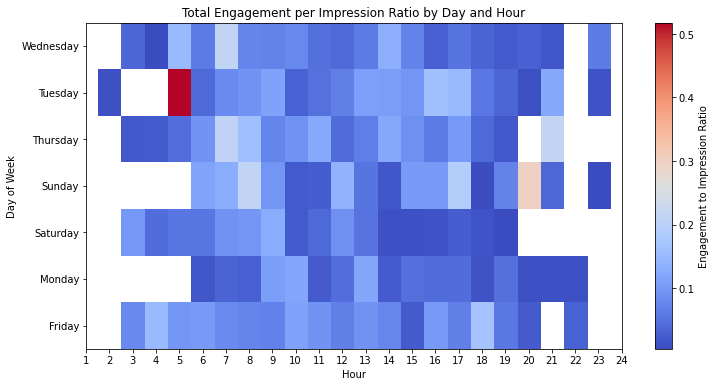

In [82]:
# Calculate vmin and vmax based on the pivot_data_correct DataFrame
vmin_correct = pivot_data_correct.min().min()
vmax_correct = pivot_data_correct.max().max()

# Set the figure size and create the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(pivot_data_correct, cmap='tab20c', vmin=vmin_correct, vmax=vmax_correct) 
# plt.imshow requires the data to be in a 2D array format. pivot_data_correct is already in the correct format.
heatmap = plt.imshow(pivot_data_correct, cmap='coolwarm', aspect='auto', vmin=vmin_correct, vmax=vmax_correct)

# Add a color bar to the heatmap
plt.colorbar(heatmap, label='Engagement to Impression Ratio')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.title('Total Engagement per Impression Ratio by Day and Hour')

# Set tick marks. np.arange(24) adjusts to create ticks for each hour; -1 adjusts starting point for visual alignment.
plt.xticks(np.arange(24) -1, range(1, 25))  # Adjusted for correct alignment
plt.yticks(np.arange(len(pivot_data_correct.index)), pivot_data_correct.index)

# Invert the y-axis to display the days in the correct order
plt.gca().invert_yaxis()

# Display the heatmap plot
plt.show()

In [83]:
# Group the data by 'Day of Week' and sum up the 'Total Engagements' for each day
engagement_by_day = data.groupby('Day of Week')['Total Engagements'].sum()

# Calculate the total engagements for all days
total_engagements = engagement_by_day.sum()

# Calculate the percentage of total engagements for each day of the week
percentage_engagement_by_day = (engagement_by_day / total_engagements) * 100

# Display the percentage of total engagements by day of the week
percentage_engagement_by_day.reset_index()

,Day of Week,Total Engagements
0,Friday,19.496451
1,Monday,5.044928
2,Saturday,4.450716
3,Sunday,11.998917
4,Thursday,23.207535
5,Tuesday,22.193416
6,Wednesday,13.608037


In [86]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


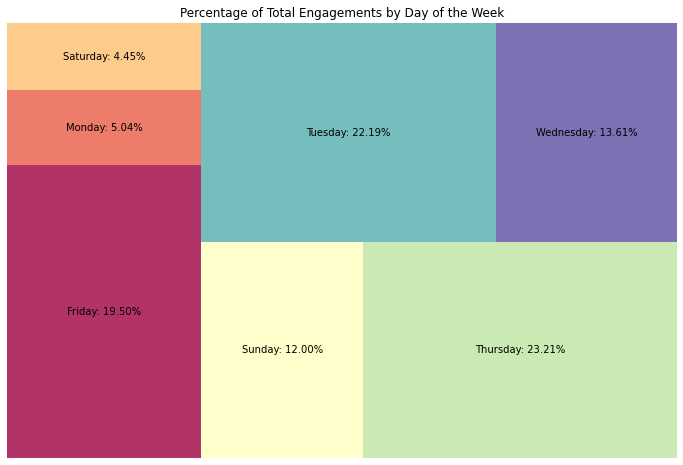

In [88]:
import squarify


# Prepare data for the treemap
#labels = percentage_engagement_by_day.index
labels = [f'{day}: {value:.2f}%' for day, value in percentage_engagement_by_day.items()]
sizes = percentage_engagement_by_day.values
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Set up the matplotlib figure and axes for the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

plt.title('Percentage of Total Engagements by Day of the Week')
plt.axis('off')  # Removes the axes for a clean look
plt.show()

In [89]:
# Engagement rate by Game title 
engagement_by_game = (data.groupby('Account')['Total Engagements'].sum() /
                                  data.groupby('Account')['Total Impressions'].sum()) * 100


engagement_by_game.reset_index()

,Account,0
0,Content Creators,3.069535
1,Game 1,4.051525
2,Game 2,6.668545
3,Game 3,3.990461
4,General,9.069150


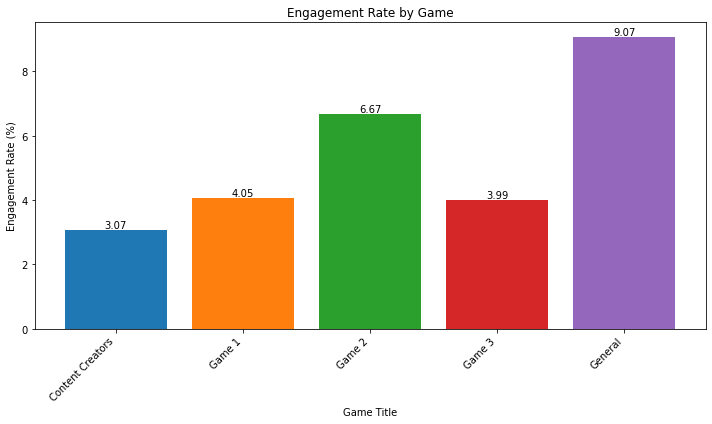

In [90]:
# Create a bar graph of the engagement rates by media type with value labels
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(engagement_by_game.index, engagement_by_game.values, color=colors)

plt.xlabel('Game Title')
plt.ylabel('Engagement Rate (%)')
plt.title('Engagement Rate by Game')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Adjust x-ticks to show media type names instead of numeric indexes
plt.xticks(range(len(engagement_by_game.index)), engagement_by_game.index)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

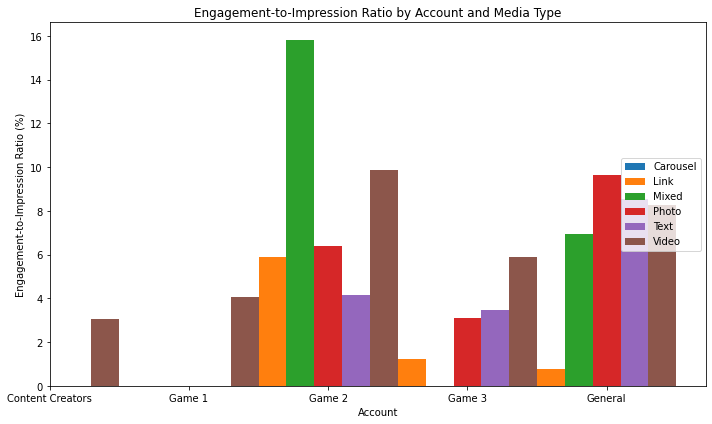

In [91]:
# Calculate the engagement-to-impression ratio for each account and media type
engagement_rate_account = (data.groupby(['Account', 'Media Type'])['Total Engagements'].sum() /
                           data.groupby(['Account', 'Media Type'])['Total Impressions'].sum()) * 100

# Convert the series to a DataFrame
df = engagement_rate_account.unstack()

# Create the clustered column graph
num_accounts = df.shape[0]
num_media_types = df.shape[1]

bar_width = 0.2  # Width of each bar
offset = np.arange(num_accounts)  # Offset for each cluster

plt.figure(figsize=(10, 6))

for i, media_type in enumerate(df.columns):
    x = np.arange(num_accounts) + (i - num_media_types / 2) * bar_width  # X-coordinates of the bars
    plt.bar(x, df[media_type], width=bar_width, label=media_type)

plt.xlabel('Account')
plt.ylabel('Engagement-to-Impression Ratio (%)')
plt.title('Engagement-to-Impression Ratio by Account and Media Type')
plt.xticks(np.arange(num_accounts), df.index)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

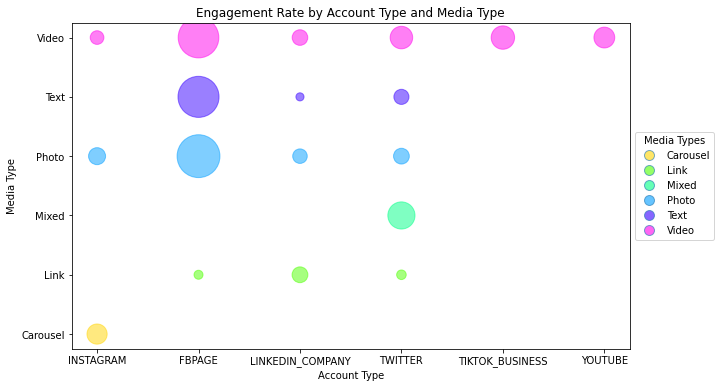

In [93]:
engagement_rate_account_media = (data.groupby(['Media Type','Account Type'])['Total Engagements'].sum() /
                           data.groupby(['Media Type','Account Type'])['Total Impressions'].sum()) * 100

# Reset index for the series to convert it into DataFrame
df = engagement_rate_account_media.reset_index()
df.columns = ['Media Type','Account Type',  'Engagement Rate']

# Create a color palette
palette = sns.color_palette("hsv", len(df['Media Type'].unique()))

# Create a dictionary to map each Media Type to a color
color_dict = dict(zip(df['Media Type'].unique(), palette))

# Create Bubble Plot
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Account Type'], df['Media Type'], s=df['Engagement Rate']*100, 
                      c=df['Media Type'].map(color_dict), alpha=0.5)

plt.xlabel('Account Type')
plt.ylabel('Media Type')
plt.title('Engagement Rate by Account Type and Media Type')

# Create a legend
proxies = [plt.Line2D([0], [0], linestyle='none', marker='o', alpha=0.6, markersize=10, markerfacecolor=color) for color in color_dict.values()]
plt.legend(proxies, color_dict.keys(), title='Media Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

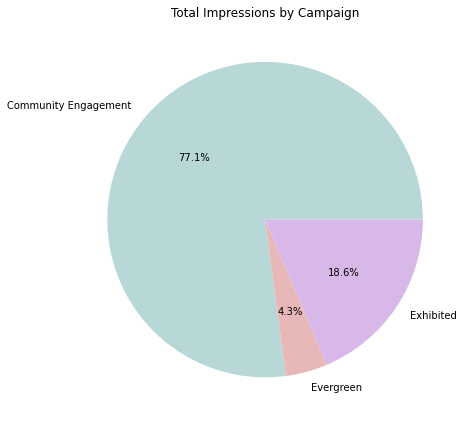

In [99]:
#Removing N/A campaign 
filtered_campaign = data[data['Campaign Name'] != 'N/A ']

# Calculate total impressions per campaign
total_impressions = filtered_campaign.groupby('Campaign Name')['Total Impressions'].sum()

# Create pie chart
pastel_colors = ['#B8D8D8', '#E8B8B8', '#D8B8E8', '#B8D8B8', '#F9E6B8']

plt.figure(figsize=(8, 6))
plt.pie(total_impressions, labels=total_impressions.index, autopct='%1.1f%%', colors=pastel_colors)
plt.title('Total Impressions by Campaign')
plt.tight_layout()
plt.show()

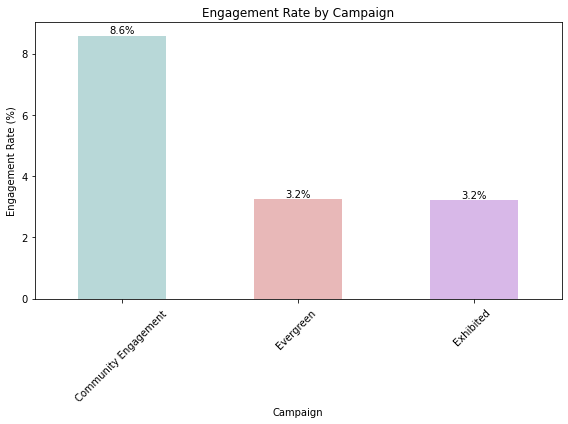

In [100]:
# Calculate engagement rate per campaign
engagement_rate_campaign = (filtered_campaign.groupby('Campaign Name')['Total Engagements'].sum() / 
                            filtered_campaign.groupby('Campaign Name')['Total Impressions'].sum()) * 100

# Create bar chart
plt.figure(figsize=(8, 6))
ax = engagement_rate_campaign.plot(kind='bar', color=pastel_colors)
plt.xlabel('Campaign')
plt.ylabel('Engagement Rate (%)')
plt.title('Engagement Rate by Campaign')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for i, v in enumerate(engagement_rate_campaign):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()
